## Random Sample Imputation

In [1]:
import pandas as pd

df = pd.read_csv(r'titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [2]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [3]:
df.isnull().mean()  #for % of the null values

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [4]:
df['age'].isnull().sum()

174

In [5]:
#dropna() drops na values and then .sample() gives random values every time
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [6]:
df[df['age'].isnull()].index  #gives the indexes

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [15]:
#func for replacing nan valuies with random
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    #random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have the same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [16]:
median = df.age.median()
median

28.0

In [17]:
impute_nan(df,'age',median)

In [19]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

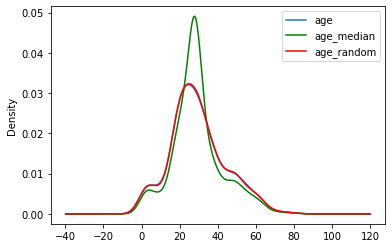

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde',ax=ax, color='green')
df.age_random.plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### amazing above is almost same after random sample imputation age and age random are almost same while age median is different 

## Capturing NAN values with a new feature

it works well if the data are not missing completely at random

In [24]:
df = pd.read_csv(r'titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [26]:
import numpy as np
df['age_nan'] = np.where(df['age'].isnull(),1,0)

In [27]:
df.head()


,age,fare,survived,age_nan
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [28]:
df.age.median()

28.0

In [29]:
#can replace these nan values with the median or mean

df['age'].fillna(df.age.median(),inplace=True)

In [31]:
df.head(10)

,age,fare,survived,age_nan
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0
5,28.0,22.5250,0,0
6,19.0,0.0000,0,0
7,30.0,13.0000,1,0
8,22.0,7.7750,1,0
9,21.0,9.8250,0,0


## End of Distribution Imputation

In [4]:
import pandas as pd
df = pd.read_csv(r'titanic_train.csv', usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


<AxesSubplot:>

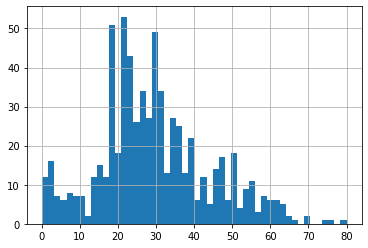

In [5]:
df.age.hist(bins=50)

In [6]:
extreme = df.age.mean()+3*df.age.std()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

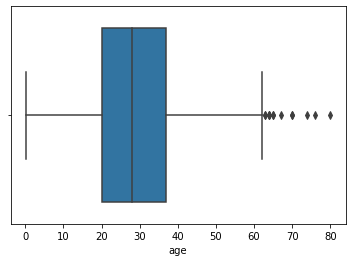

In [7]:
import seaborn as sns
sns.boxplot('age',data=df)

In [8]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [10]:
df.age.median()

28.0

In [13]:
impute_nan(df,'age',median,extreme)

NameError: name 'median' is not defined

In [14]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0
